# load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# load dataset

In [2]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1Y7F1G5dGaA_M5UK3wlfzS2WoWKTRpY0r

Downloading...
From: https://drive.google.com/uc?id=1Y7F1G5dGaA_M5UK3wlfzS2WoWKTRpY0r
To: /content/data.npy
100% 928/928 [00:00<00:00, 2.82MB/s]


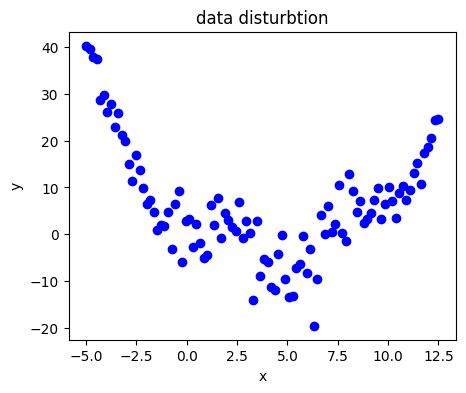

In [44]:
y = np.load('/content/data.npy')
x = np.linspace(-5, 12.5, len(y))

plt.figure(figsize=(5,4))
plt.scatter(x, y, color='b', label='Data Points', marker='o')
plt.title('data disturbtion')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 2.1

Training data: (80,), Test data: (20,)


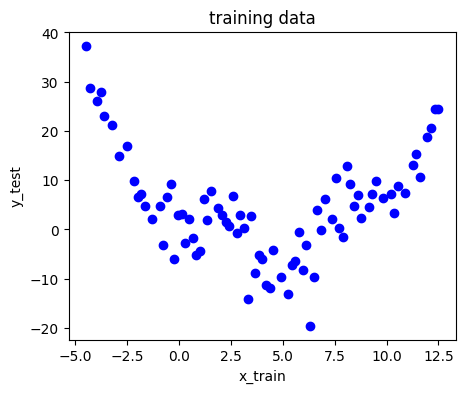

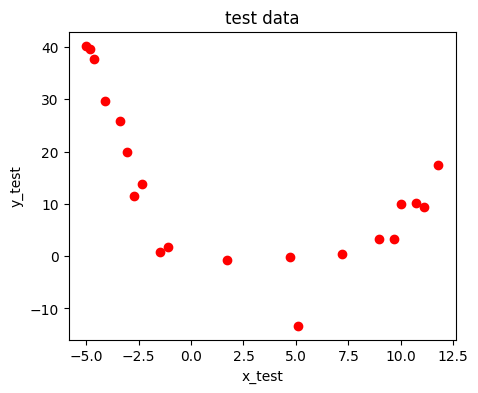

In [45]:
# Split data into train and test(80%, 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

print(f"Training data: {x_train.shape}, Test data: {x_test.shape}")

plt.figure(figsize=(5,4))
plt.scatter(x_train, y_train, color='b', label='Data Points', marker='o')
plt.title('training data')
plt.xlabel('x_train')
plt.ylabel('y_test')
plt.show()

plt.figure(figsize=(5,4))
plt.scatter(x_test, y_test, color='r', label='Data Points', marker='o')
plt.title('test data')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.show()

# 2.3

<ipython-input-46-8795a82fbff4>:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat[d] = Z
<ipython-input-46-8795a82fbff4>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat_test[d] = Z


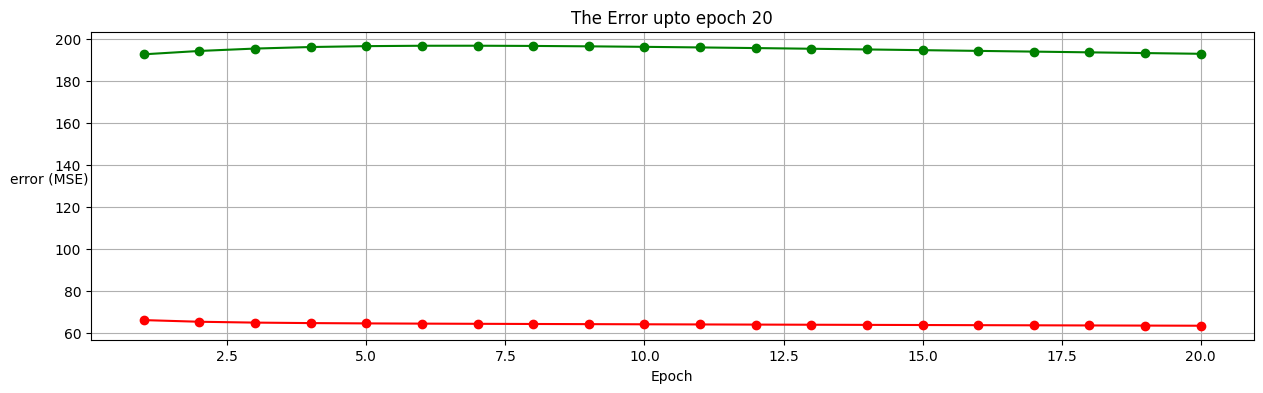

Mean Absolute Error (MAE): 13.93
Mean Squared Error (MSE): 386.03
R-squared (R²): -0.80


In [46]:
n_features = 1
learning_rate = 0.0001
cost_list = []
cost_list_test = []
w_hist = []
b_hist = []
dj_hist = []

# initialization
np.random.seed(69)
w = np.random.rand(1,n_features)*2 - 0.5
np.random.seed(69)
b = np.random.rand(1)*2 - 0.5

for i in range(20):

    w_hist.append(w)
    b_hist.append(b)


    # creating an empty array for yhat
    y_hat = np.zeros((y_train.shape[0],))
    y_hat_test = np.zeros((y_test.shape[0],))

    # Forward
    for d in range(y_hat.shape[0]):

        x = x_train[d]
        Z = np.dot(w,x) + b
        y_hat[d] = Z


    # J = 1/(2N) sum((y_hat - y)^2)
    E = y_train-y_hat
    e = 1/2 * np.dot(E,E)
    e *= 1/(len(y_train))
    cost_list.append(e)


    # Test forward
    for d in range(y_hat_test.shape[0]):

        x = x_test[d]
        Z = np.dot(w,x) + b
        y_hat_test[d] = Z

    # Test error
    E_test = y_test - y_hat_test
    e_test = 1/2 * np.dot(E_test,E_test)
    e_test *= 1/len(y_test)
    cost_list_test.append(e_test)

    # Update
    # w := w - eta * dj/dw = w - eta * sum[(y_hat - y)x]  = w + eta * sum[(y - y_hat)x]
    dj = np.dot(x_train.T,E)
    dj_hist.append(dj)
    w = w + learning_rate*dj
    b = b + learning_rate*np.sum(E)

# Plot error
plt.figure(figsize=(15,4))
plt.plot(list(range(1,len(cost_list)+1)),cost_list,
            marker='o',
            markerfacecolor = 'red',
            color = 'red')

plt.plot(list(range(1,len(cost_list_test)+1)),cost_list_test,
            marker='o',
            markerfacecolor = 'green',
            color = 'green')
plt.title(f'The Error upto epoch {i+1}')
plt.ylabel('error (MSE)', rotation=0)
plt.xlabel('Epoch')

plt.grid()
plt.show()

b_hist = np.array(b_hist)
w_hist = np.array(w_hist)
cost_arr = np.array(cost_list)

###########
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_hat_test)
mse = mean_squared_error(y_test, y_hat_test)
r_squared = r2_score(y_test, y_hat_test)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r_squared:.2f}")

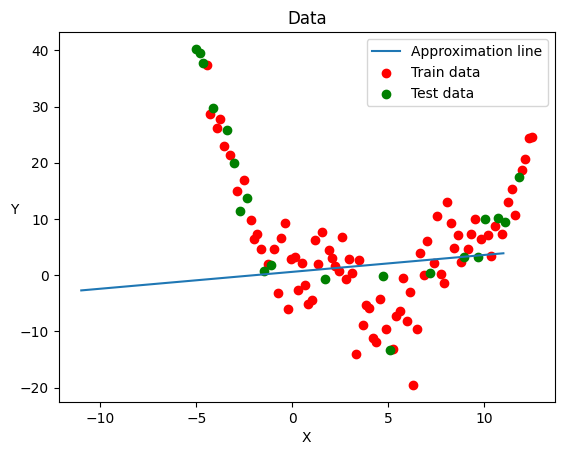

In [6]:
t = np.linspace(-11, 11, 3)
plt.plot(
    t,
    (t*w + b).reshape(-1,),
    label = 'Approximation line'
)

plt.scatter(
    x_train,y_train,
    c = 'red',
    label='Train data'
)

plt.scatter(
    x_test,y_test,
    c = 'green',
    label='Test data'
)

plt.title('Data')
plt.xlabel('X')
plt.ylabel('Y', rotation = 0)
plt.legend()

# 2.4

<ipython-input-47-656173f355b3>:11: RuntimeWarning: divide by zero encountered in scalar divide
  r2 = 1 - (np.sum(error ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))


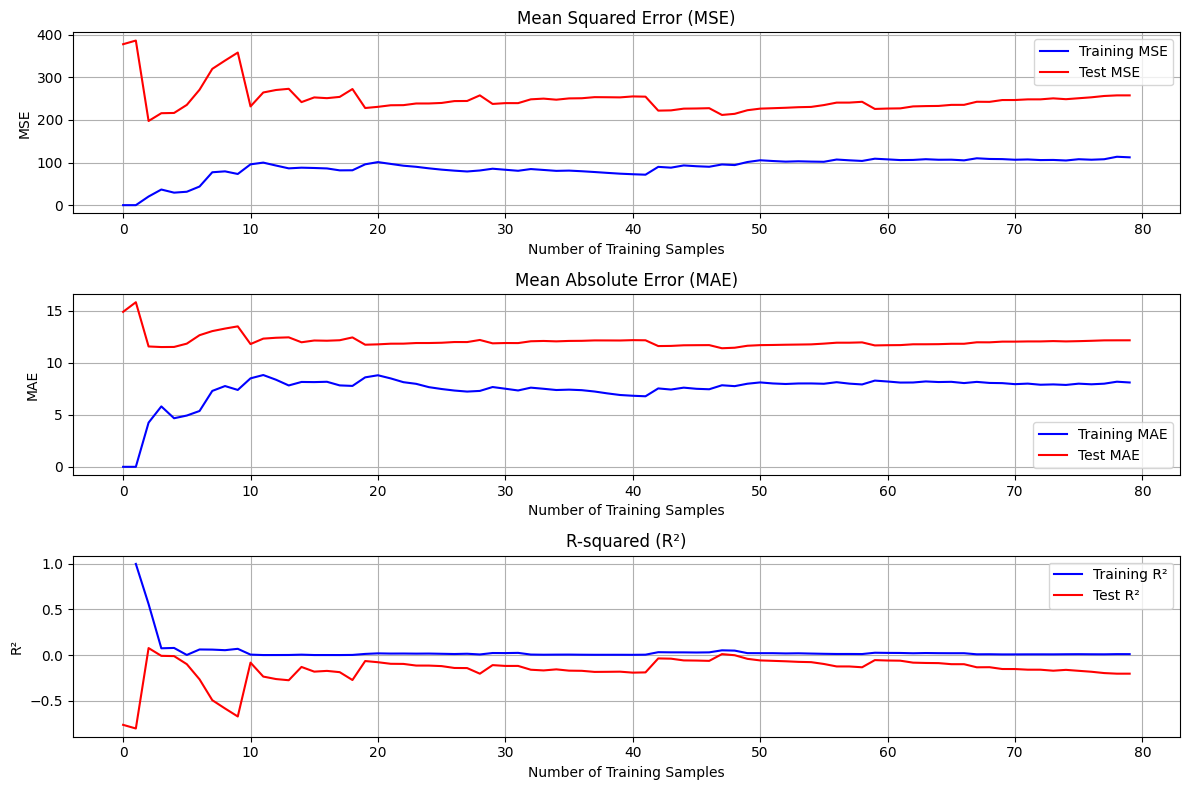

In [47]:
# Initialize lists to store metrics
mse_list = []
mae_list = []
r2_list = []

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    error = y_pred - y_true
    mse = np.mean(error ** 2)
    mae = np.mean(np.abs(error))
    r2 = 1 - (np.sum(error ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    return mse, mae, r2

# Incrementally train the model
for i in range(1, len(x_train) + 1):

    X_train = x_train[:i]
    y_train_subset = y_train[:i]

    # initialization
    np.random.seed(69)
    w = np.random.rand(1,n_features)*2 - 0.5
    np.random.seed(69)
    b = np.random.rand(1)*2 - 0.5

    # Gradient descent
    learning_rate = 0.01
    epochs = 1000

    for epoch in range(epochs):
        # Predictions
        y_pred = w * X_train + b

        # Calculate cost function J
        N = len(y_train_subset)
        J = (1 / (2 * N)) * np.sum((y_pred - y_train_subset) ** 2)

        # Calculate gradients
        w_gradient = (1 / N) * np.sum((y_pred - y_train_subset) * X_train)
        b_gradient = (1 / N) * np.sum(y_pred - y_train_subset)

        # Update weights and bias
        w -= learning_rate * w_gradient
        b -= learning_rate * b_gradient

    # predictions on both training and test sets after training on i samples
    y_train_pred = w * X_train + b

    # Calculate metrics for training data
    mse_train, mae_train, r2_train = calculate_metrics(y_train_subset, y_train_pred)

    # Calculate metrics for test data
    y_test_pred = w * x_test + b
    mse_test, mae_test, r2_test = calculate_metrics(y_test, y_test_pred)

    # Store metrics
    mse_list.append((mse_train, mse_test))
    mae_list.append((mae_train, mae_test))
    r2_list.append((r2_train, r2_test))

# Convert lists to arrays
mse_list = np.array(mse_list)
mae_list = np.array(mae_list)
r2_list = np.array(r2_list)

# Plotting the metrics
plt.figure(figsize=(12, 8))

# MSE Plot
plt.subplot(3, 1, 1)
plt.plot(mse_list[:, 0], label='Training MSE', color='blue')
plt.plot(mse_list[:, 1], label='Test MSE', color='red')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Number of Training Samples')
plt.ylabel('MSE')
plt.legend()
plt.grid()

# MAE Plot
plt.subplot(3, 1, 2)
plt.plot(mae_list[:, 0], label='Training MAE', color='blue')
plt.plot(mae_list[:, 1], label='Test MAE', color='red')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Number of Training Samples')
plt.ylabel('MAE')
plt.legend()
plt.grid()

# R² Plot
plt.subplot(3, 1, 3)
plt.plot(r2_list[:, 0], label='Training R²', color='blue')
plt.plot(r2_list[:, 1], label='Test R²', color='red')
plt.title('R-squared (R²)')
plt.xlabel('Number of Training Samples')
plt.ylabel('R²')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# 2.6

<ipython-input-48-937b42512e35>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat[d] = Z
<ipython-input-48-937b42512e35>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat_test[d] = Z_test
<ipython-input-48-937b42512e35>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_hat[d] = Z
<ipython-input-48-937b42512e35>:45: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single 

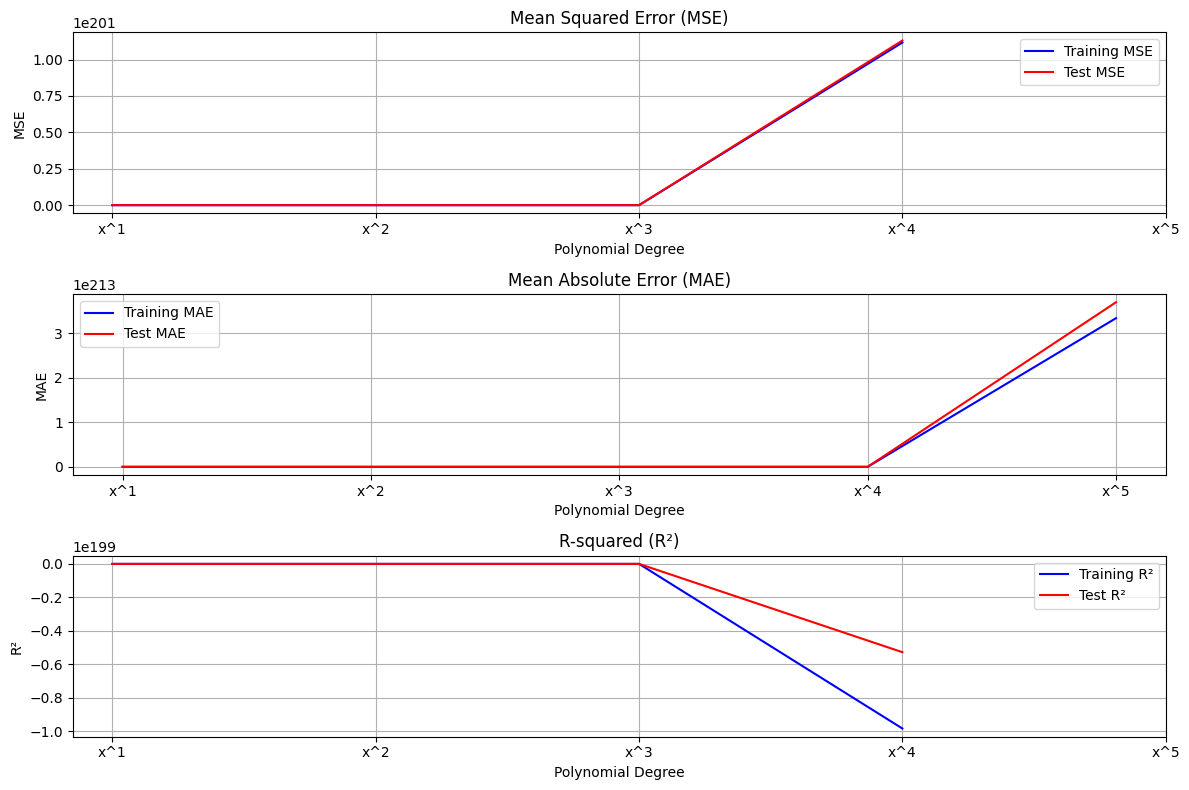

In [48]:
n_features = 1
learning_rate = 0.000001
cost_list = []
cost_list_test = []
max_degree = 5  # Maximum degree of polynomial features


mse_list_train = []
mse_list_test = []
mae_list_train = []
mae_list_test = []
r2_list_train = []
r2_list_test = []

for degree in range(1, max_degree + 1):
    # Create polynomial features
    X_train_poly = np.power(x_train.reshape(-1, 1), degree)
    X_test_poly = np.power(x_test.reshape(-1, 1), degree)


    cost_list.clear()  # Clear previous cost lists for new degree
    cost_list_test.clear()

    # Training for each epoch
    for i in range(20):  # Number of epochs can be adjusted
        # Creating an empty array for y_hat
        y_hat = np.zeros((y_train.shape[0],))
        y_hat_test = np.zeros((y_test.shape[0],))

        # Forward  (for training data)
        for d in range(y_hat.shape[0]):
            x = X_train_poly[d]
            Z = np.dot(w, x) + b
            y_hat[d] = Z

        # training error (MSE)
        E_train = y_train - y_hat
        e_train = (1 / (2 * len(y_train))) * np.dot(E_train, E_train)
        cost_list.append(e_train)

        # Forward (for test data)
        for d in range(y_hat_test.shape[0]):
            x = X_test_poly[d]
            Z_test = np.dot(w, x) + b
            y_hat_test[d] = Z_test

        # test error (MSE)
        E_test = y_test - y_hat_test
        e_test = (1 / (2 * len(y_test))) * np.dot(E_test, E_test)
        cost_list_test.append(e_test)

        # gradient descent update for weights and bias
        dj = np.dot(X_train_poly.T, E_train)
        w += learning_rate * dj.reshape(w.shape)
        b += learning_rate * np.sum(E_train)

    # Calculate performance metrics
    mse_train = mean_squared_error(y_train, y_hat)
    mse_test = mean_squared_error(y_test, y_hat_test)

    mae_train = mean_absolute_error(y_train, y_hat)
    mae_test = mean_absolute_error(y_test, y_hat_test)

    r2_train = r2_score(y_train, y_hat)
    r2_test = r2_score(y_test, y_hat_test)

    # Store metrics
    mse_list_train.append(mse_train)
    mse_list_test.append(mse_test)
    mae_list_train.append(mae_train)
    mae_list_test.append(mae_test)
    r2_list_train.append(r2_train)
    r2_list_test.append(r2_test)

# Plotting the metrics
plt.figure(figsize=(12, 8))

# MSE Plot
plt.subplot(3, 1, 1)
plt.plot(range(1, max_degree + 1), mse_list_train, label='Training MSE', color='blue')
plt.plot(range(1, max_degree + 1), mse_list_test, label='Test MSE', color='red')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.xticks(range(1, max_degree + 1), [f'x^{i}' for i in range(1, max_degree + 1)])
plt.legend()
plt.grid()

# MAE Plot
plt.subplot(3, 1, 2)
plt.plot(range(1, max_degree + 1), mae_list_train, label='Training MAE', color='blue')
plt.plot(range(1, max_degree + 1), mae_list_test, label='Test MAE', color='red')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Polynomial Degree')
plt.ylabel('MAE')
plt.xticks(range(1, max_degree + 1), [f'x^{i}' for i in range(1, max_degree + 1)])
plt.legend()
plt.grid()

# R² Plot
plt.subplot(3, 1, 3)
plt.plot(range(1, max_degree + 1), r2_list_train, label='Training R²', color='blue')
plt.plot(range(1, max_degree + 1), r2_list_test, label='Test R²', color='red')
plt.title('R-squared (R²)')
plt.xlabel('Polynomial Degree')
plt.ylabel('R²')
plt.xticks(range(1, max_degree + 1), [f'x^{i}' for i in range(1, max_degree + 1)])
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

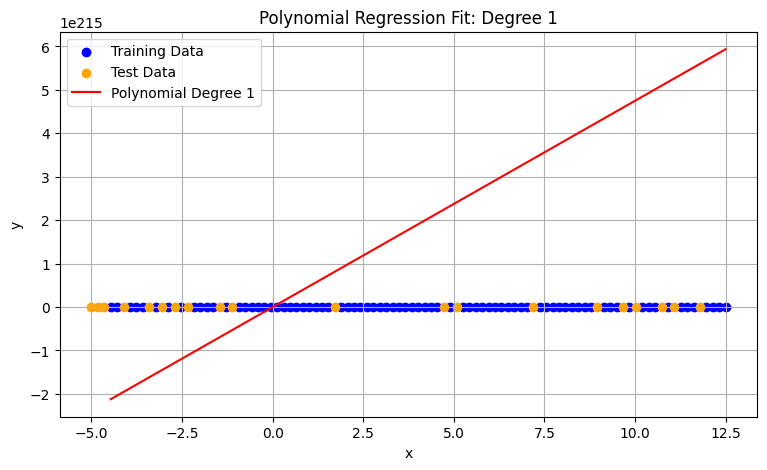

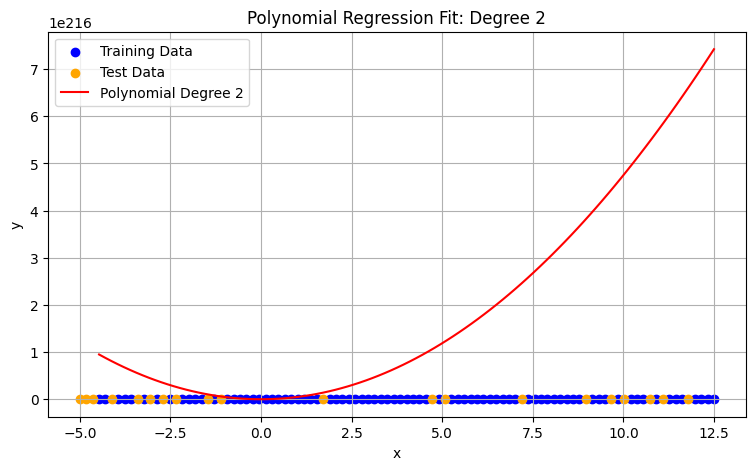

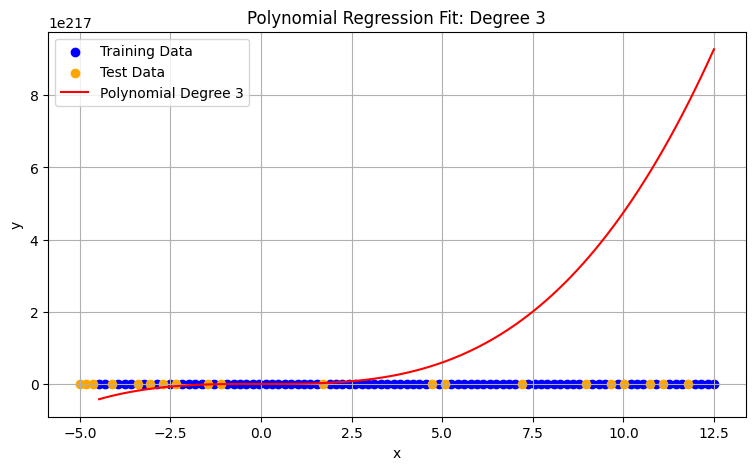

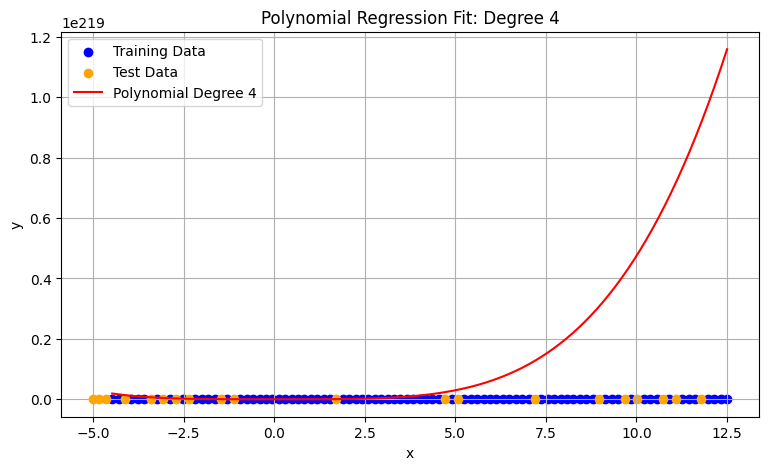

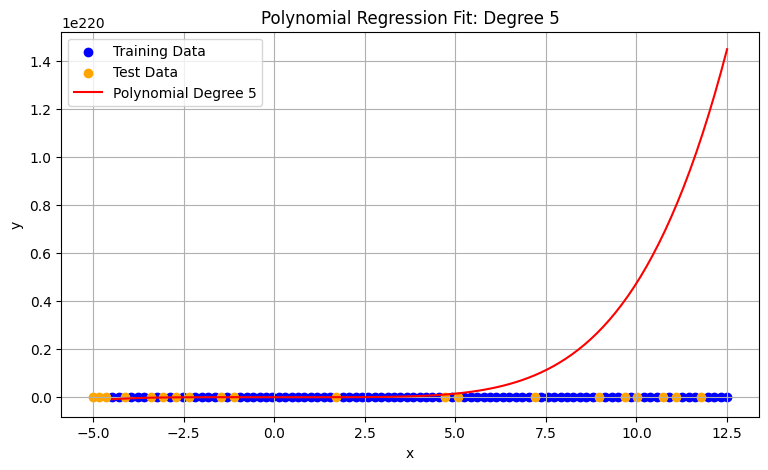

In [50]:
#plot the predicted lines for each polynomial degree on the training data.
x_range = np.linspace(np.min(x_train), np.max(x_train), 100).reshape(-1, 1)

for degree in range(1, max_degree + 1):
    X_range_poly = np.power(x_range, degree)

    # Predictions with the last trained weights and bias
    y_pred_range = w * X_range_poly + b

    plt.figure(figsize=(9,5))

    plt.scatter(x_train, y_train, color='blue', label='Training Data')
    plt.scatter(x_test, y_test, color='orange', label='Test Data')

    plt.plot(x_range, y_pred_range.flatten(), color='red', label=f'Polynomial Degree {degree}')

    plt.title(f'Polynomial Regression Fit: Degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')



    plt.legend()
    plt.grid()

    plt.show()

# 2.7

Decision Tree:
  MSE Train: 0.0000
  MSE Test: 16.5396
  MAE Train: 0.0000
  MAE Test: 3.2870
  R² Train: 1.0000
  R² Test: 0.9227

Random Forest:
  MSE Train: 4.2695
  MSE Test: 16.1457
  MAE Train: 1.6080
  MAE Test: 3.2499
  R² Train: 0.9623
  R² Test: 0.9245

Gradient Boosting:
  MSE Train: 2.2634
  MSE Test: 13.0073
  MAE Train: 1.2222
  MAE Test: 3.1058
  R² Train: 0.9800
  R² Test: 0.9392



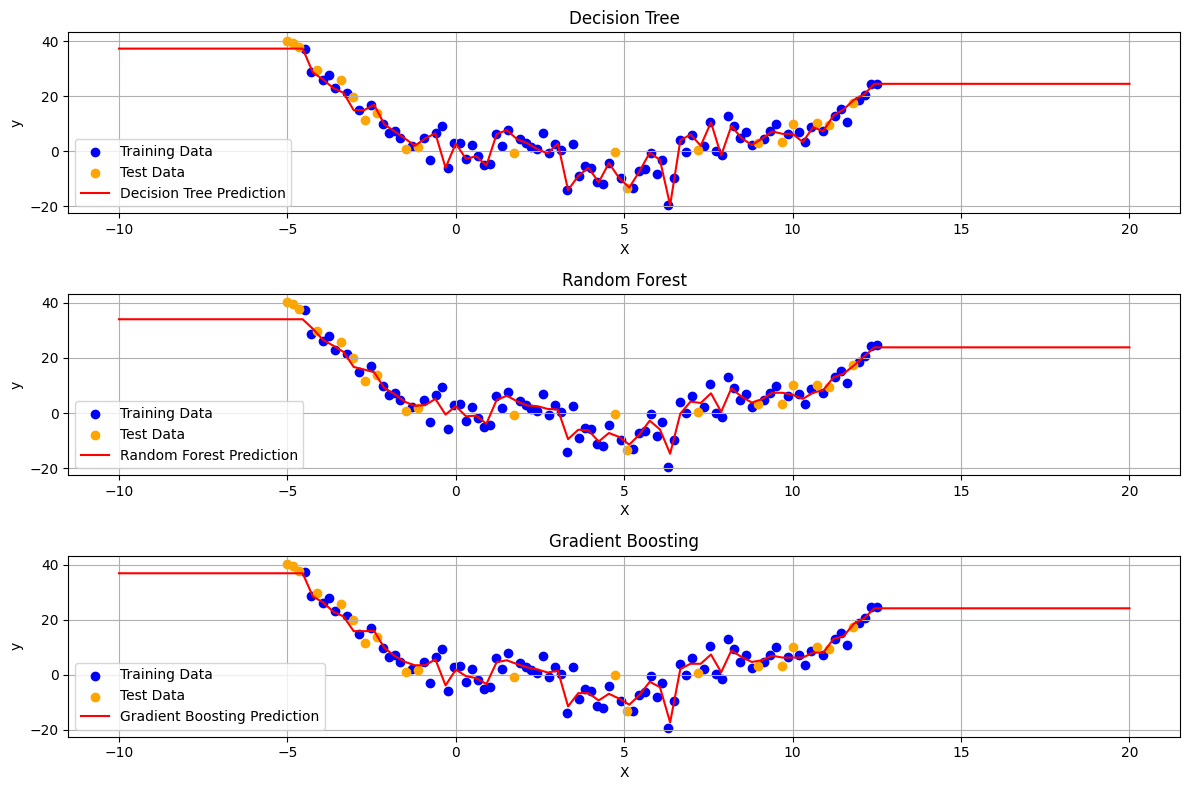

In [51]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Store metrics
results = {}

# Train each model and evaluate performance
for name, model in models.items():

    model.fit(x_train.reshape(-1, 1), y_train)  # Ensure x_train is 2D

    # Make predictions
    y_train_pred = model.predict(x_train.reshape(-1, 1))  # Ensure x_train is 2D
    y_test_pred = model.predict(x_test.reshape(-1, 1))    # Ensure x_test is 2D

    # Calculate metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Store results
    results[name] = {
        "MSE Train": mse_train,
        "MSE Test": mse_test,
        "MAE Train": mae_train,
        "MAE Test": mae_test,
        "R² Train": r2_train,
        "R² Test": r2_test,
    }

# Print results for each model
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()

# Plotting predictions for each model on test data
plt.figure(figsize=(12, 8))
x_range = np.linspace(-10, 20, 100).reshape(-1, 1)  # Create a range for plotting predictions

for name, model in models.items():
    plt.subplot(3, 1, list(models.keys()).index(name) + 1)

    plt.scatter(x_train, y_train, color='blue', label='Training Data')
    plt.scatter(x_test, y_test, color='orange', label='Test Data')

    # Predictions for plotting
    y_pred_range = model.predict(x_range)

    plt.plot(x_range, y_pred_range, color='red', label=f'{name} Prediction')

    plt.title(f'{name}')
    plt.xlabel('X')
    plt.ylabel('y')

    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()